In [51]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
import random
import math
import matplotlib.image as mpimg

In [5]:
DATA_DIR = "./test_data"

In [6]:
dfs = pd.read_csv(path.join(DATA_DIR, 'shots.csv'))
dfg = pd.read_csv(path.join(DATA_DIR, 'games.csv')).sort_values('date_time_gmt')
dfp = pd.read_csv(path.join(DATA_DIR, 'players.csv'))
dft = pd.read_csv(path.join(DATA_DIR, 'teams.csv'))
dfpg = pd.read_csv(path.join(DATA_DIR, 'player_games.csv'))

In [7]:
dfs.head()

,name,pos,dist,hand,st_x,st_y,goal,team,event,period,...,assist,assist2,blocker,goalie,scorer,date_time,shot_type,missed_net,empty,gw
0,J. McCann,C,31.575307,L,58.0,6.0,False,PIT,Shot,1,...,NaN,NaN,NaN,8475622.0,NaN,2019-10-04 00:14:44,snap,False,False,False
1,J. Skinner,LW,87.281155,L,2.0,7.0,False,BUF,Shot,1,...,NaN,NaN,NaN,8476899.0,NaN,2019-10-04 00:14:51,slap,False,False,False
2,J. Vesey,LW,9.486833,L,86.0,9.0,False,BUF,Shot,1,...,NaN,NaN,NaN,8476899.0,NaN,2019-10-04 00:15:13,wrist,False,False,False
3,C. Sheary,LW,19.416488,L,85.0,-19.0,False,BUF,Shot,1,...,NaN,NaN,NaN,8476899.0,NaN,2019-10-04 00:15:40,wrist,False,False,False
4,R. Ristolainen,D,59.941638,R,36.0,-28.0,False,BUF,Shot,1,...,NaN,NaN,NaN,8476899.0,NaN,2019-10-04 00:16:08,wrist,False,False,False


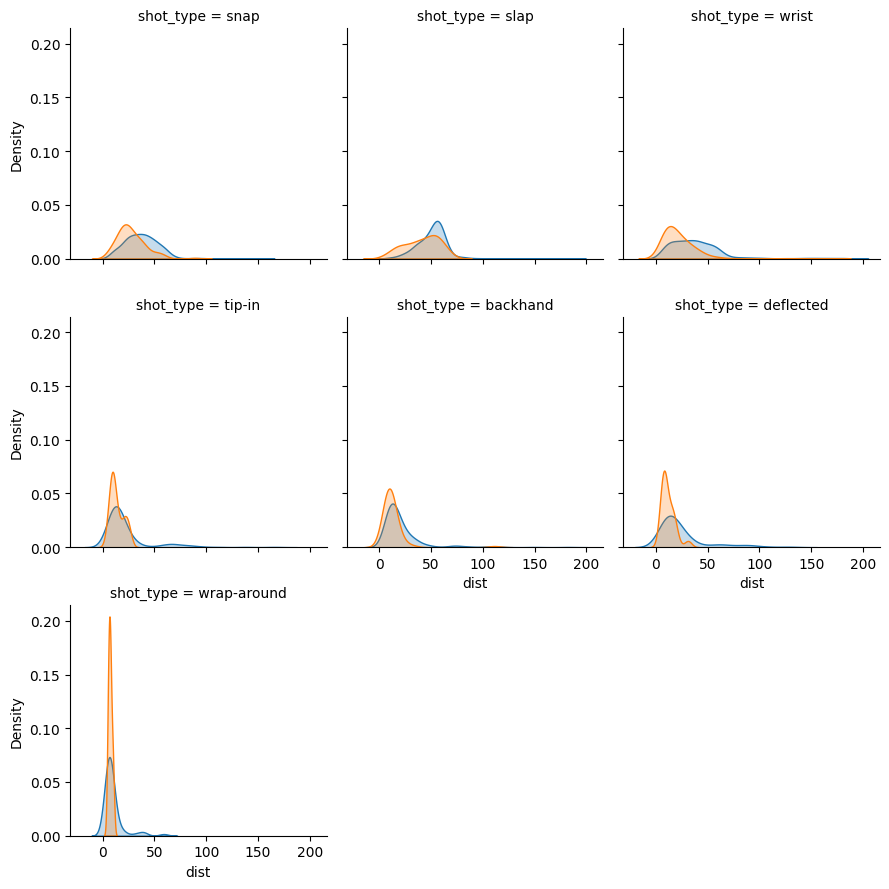

In [8]:
g = sns.FacetGrid(dfs, col="shot_type", hue="goal", col_wrap=3).map(sns.kdeplot, "dist", fill=True)

In [9]:
def home_away_goals_df(df, location):
    df = df[['game_id', 'date_time_gmt', f'{location}_team', f'{location}_goals']].copy()
    df.columns = ['game_id', 'date_time_gmt', 'team', 'goals']
    df['location'] = location
    return df

In [12]:
goals_long = pd.concat([home_away_goals_df(dfg, loc) for loc in ['home', 'away']], ignore_index=True).sort_values(by="game_id")

In [13]:
goals_long.head()

,game_id,date_time_gmt,team,goals,location
0,2019020001,2019-10-02T23:00:00Z,TOR,5,home
1094,2019020001,2019-10-02T23:00:00Z,OTT,3,away
1,2019020002,2019-10-03T00:00:00Z,STL,2,home
1095,2019020002,2019-10-03T00:00:00Z,WSH,3,away
2,2019020003,2019-10-03T02:00:00Z,EDM,3,home


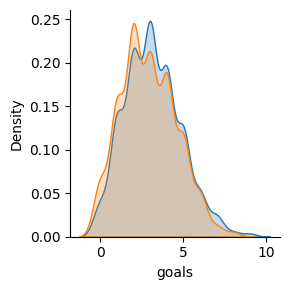

In [14]:
g = sns.FacetGrid(goals_long, hue="location").map(sns.kdeplot, "goals", fill=True)

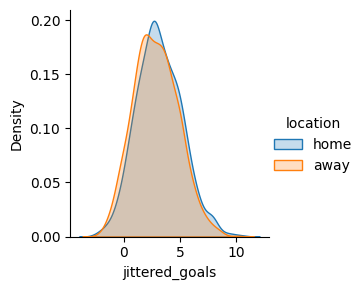

In [16]:
goals_long['jittered_goals'] = goals_long['goals'].apply(lambda x: x + random.gauss(0, 1))
g = sns.FacetGrid(goals_long, hue="location").map(sns.kdeplot, 'jittered_goals', fill=True).add_legend()

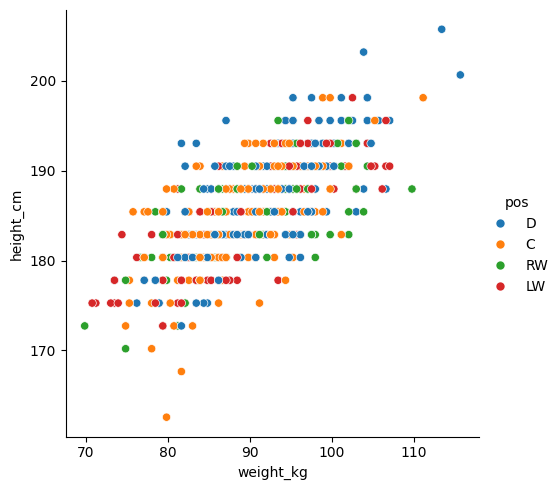

In [17]:
g = sns.relplot(data=dfp, x="weight_kg", y="height_cm", hue="pos")

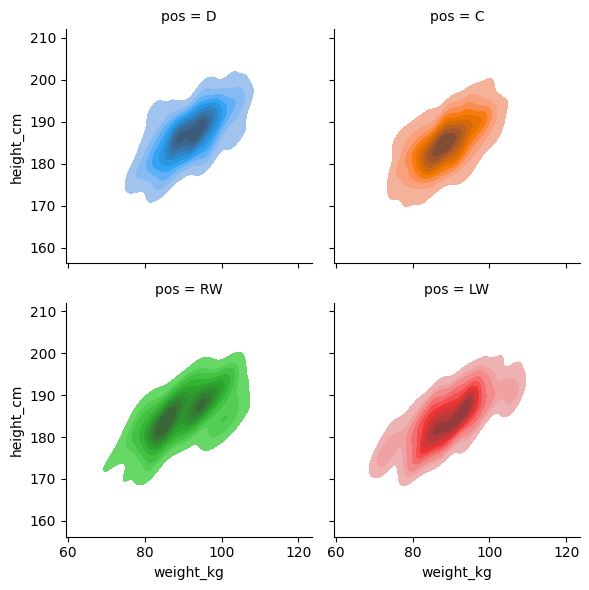

In [18]:
g = sns.FacetGrid(dfp, col="pos", hue="pos", col_wrap=2).map(sns.kdeplot, "weight_kg", "height_cm", fill=True)

In [19]:
dfgt = (pd.merge(goals_long, dft[['team', 'division', 'conference']]).sort_values('date_time_gmt'))

In [26]:
dfgt['month'] = dfgt['date_time_gmt'].apply(lambda d:d[0:7])

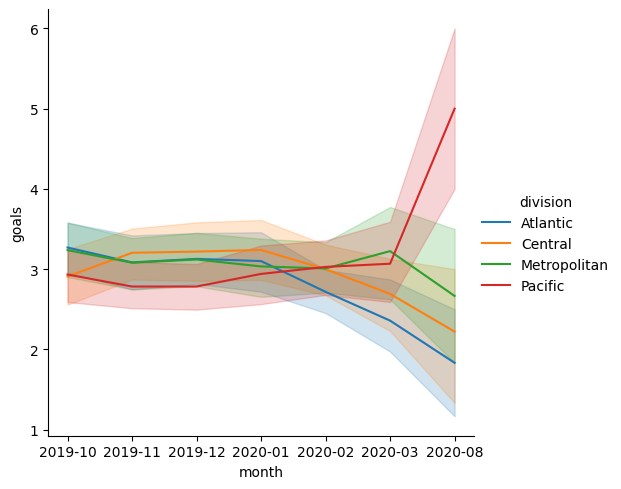

In [28]:
g = sns.relplot(x="month", y="goals", kind="line", hue="division", data=dfgt)

In [29]:
dfgt.query("month == '2019-10' & division == 'Atlantic'")[['game_id', 'date_time_gmt', 'team', 'location', 'month', 'goals']]

,game_id,date_time_gmt,team,location,month,goals
0,2019020001,2019-10-02T23:00:00Z,TOR,home,2019-10,5
1,2019020001,2019-10-02T23:00:00Z,OTT,away,2019-10,3
15,2019020008,2019-10-03T23:00:00Z,MTL,away,2019-10,3
12,2019020007,2019-10-03T23:00:00Z,BUF,away,2019-10,3
9,2019020005,2019-10-03T23:00:00Z,FLA,away,2019-10,2
...,...,...,...,...,...,...
360,2019020181,2019-10-29T23:30:00Z,TBL,away,2019-10,1
367,2019020184,2019-10-29T23:30:00Z,DET,home,2019-10,3
375,2019020188,2019-10-30T23:00:00Z,TBL,away,2019-10,7
381,2019020191,2019-10-31T02:00:00Z,FLA,away,2019-10,4


In [30]:
mean_goals = (dfgt.groupby(['division', 'month'], as_index=False)['goals'].mean())

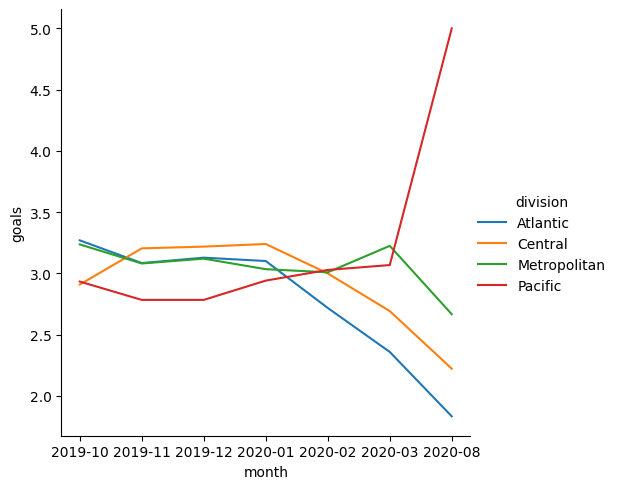

In [32]:
g = sns.relplot(x="month", y="goals", kind="line", data=mean_goals, hue="division")

In [35]:
dfs["period_min"] = dfs["period_time_remaining"].apply(lambda x: math.floor((1200-x)/60))

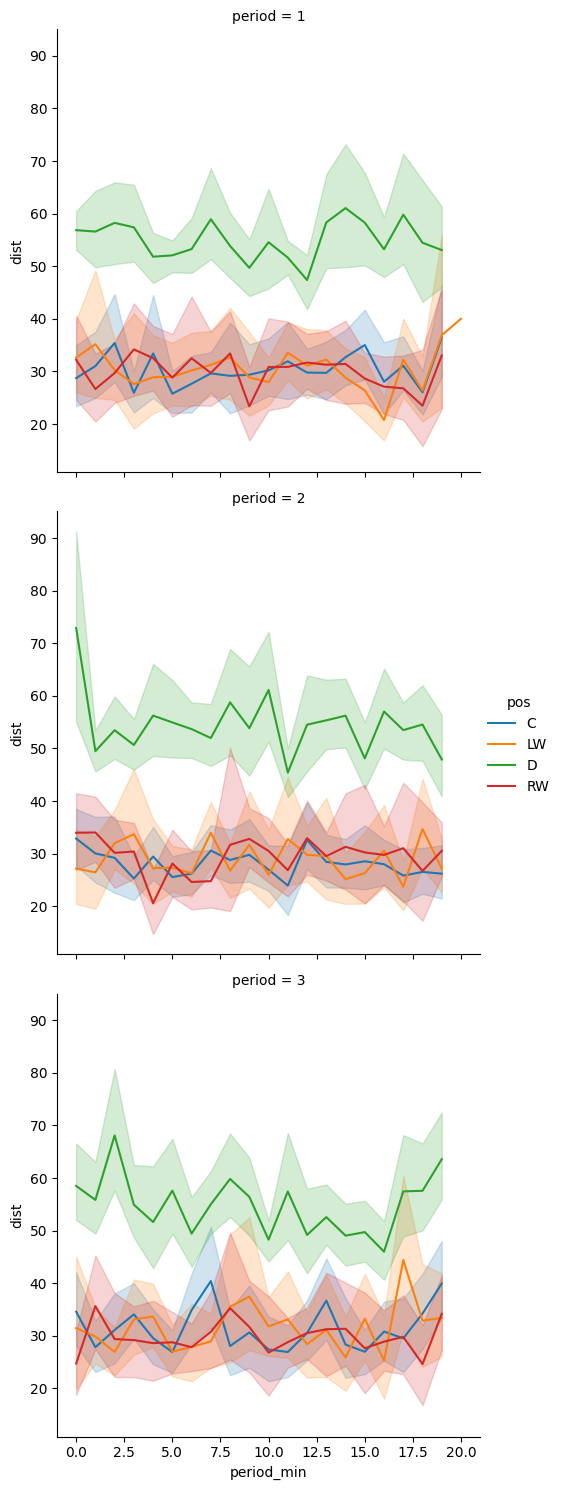

In [36]:
g = sns.relplot(x="period_min", y="dist", kind="line", hue="pos", data=dfs.query("period <= 3"), row="period")

Text(0.5, 0.98, 'Distribution of Shot Distance by Type')

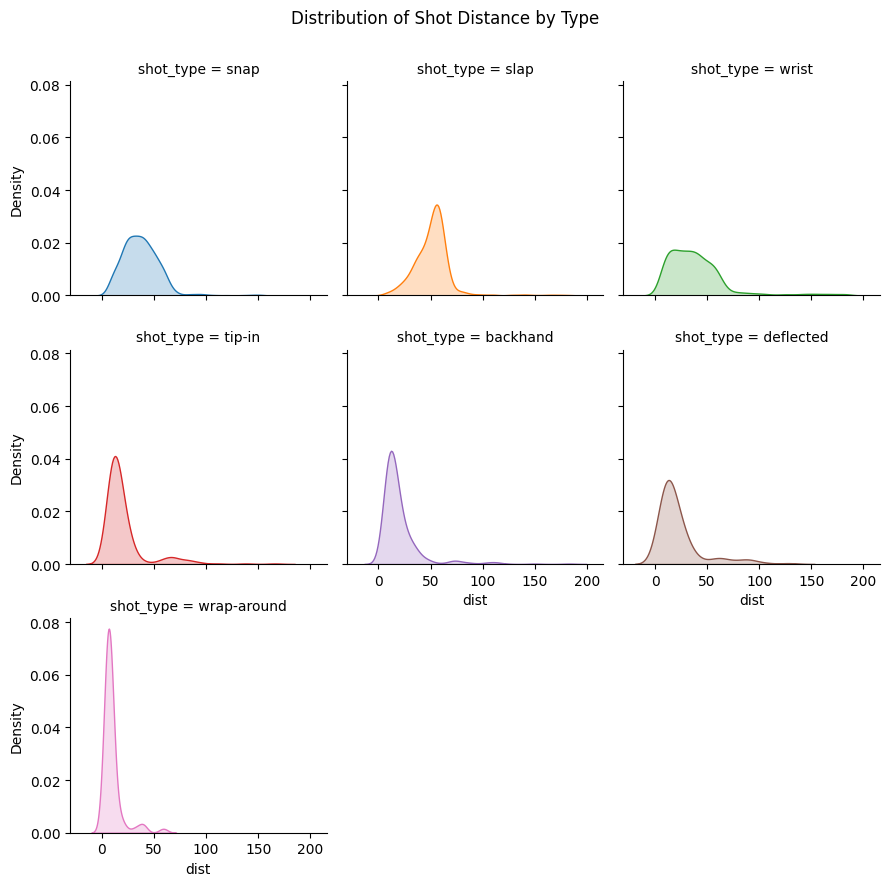

In [39]:
g = sns.FacetGrid(dfs, col="shot_type", hue="shot_type", col_wrap=3).map(sns.kdeplot, "dist", fill=True)
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle("Distribution of Shot Distance by Type")

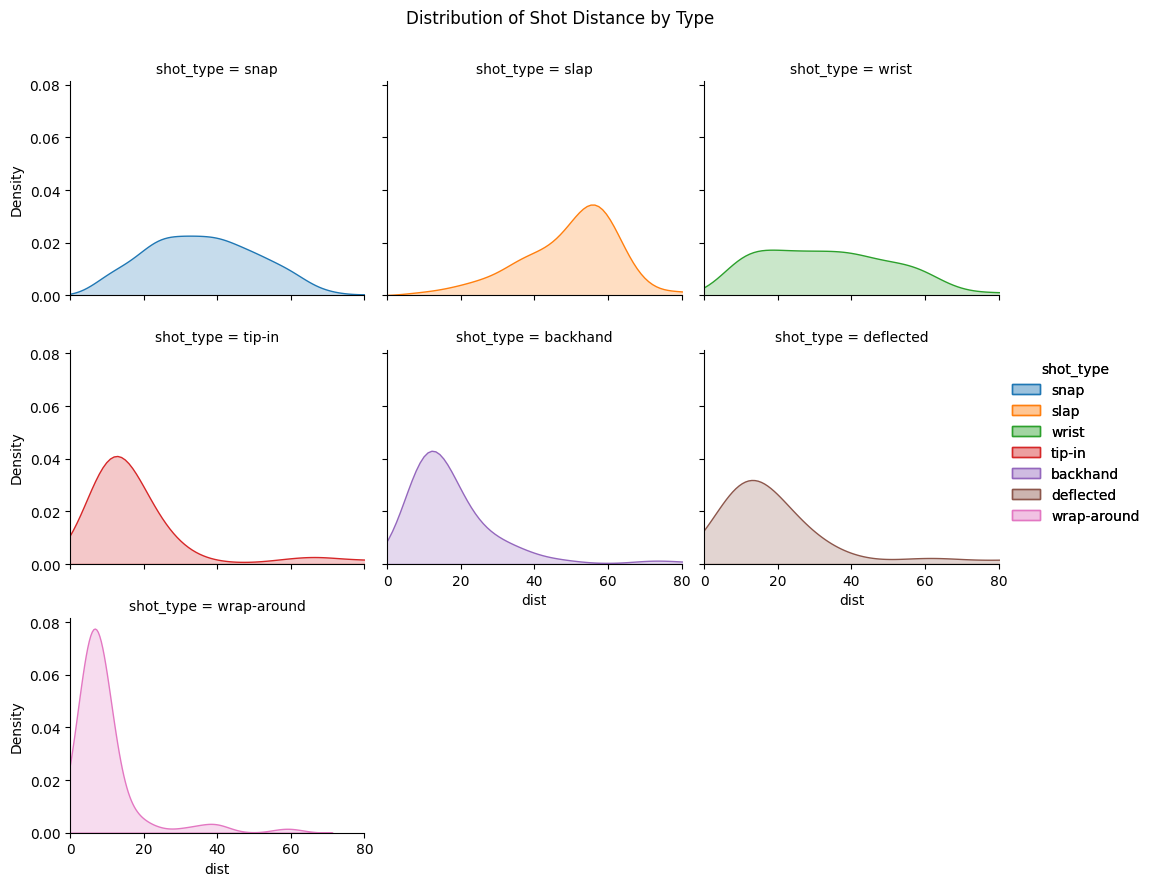

In [41]:
g.set(xlim=(0, 80))
g.add_legend()
g.figure

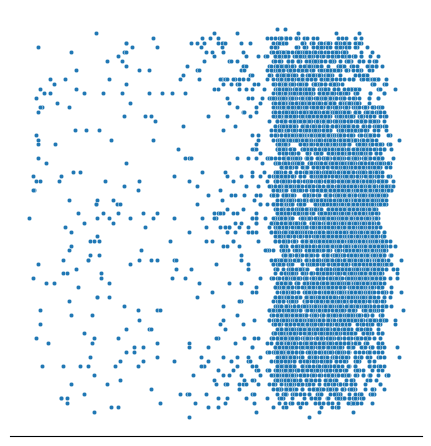

In [50]:
g = sns.relplot(data=dfs, x="st_x", y="st_y", kind="scatter", s=10)
g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, right=True)

In [55]:
map_img = mpimg.imread("./test_data/hockey_rink.png")

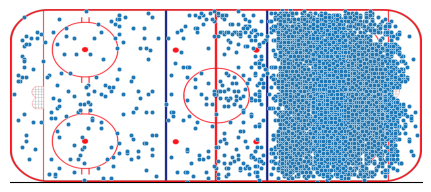

In [57]:
g = sns.relplot(data=dfs, x="st_x", y="st_y", kind="scatter", s=10)
g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, right=True)
for ax in g.figure.axes:
    ax.imshow(map_img, zorder=0, extent=[-100, 100, -42, 42])


In [58]:
def shot_chart(df, **kwargs):
    g = sns.relplot(data=dfs, x="st_x", y="st_y", kind="scatter", **kwargs)
    g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
    g.despine(left=True, bottom=True)
    for ax in g.figure.axes:
        ax.imshow(map_img, zorder=0, extent=[-100, 100, -42, 42])
    return g

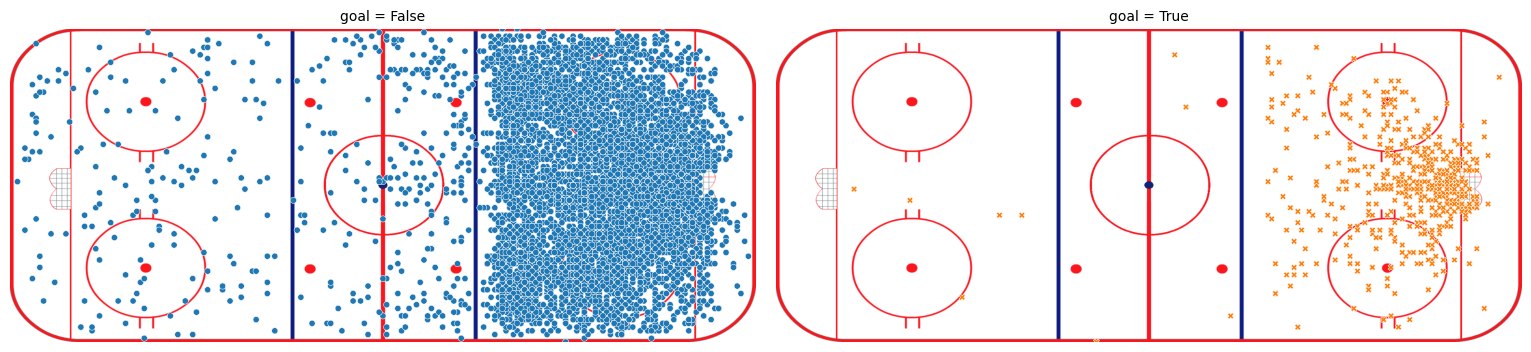

In [59]:
g = shot_chart(dfs, col="goal", hue="goal", style="goal", s=20, height=8, legend=False)

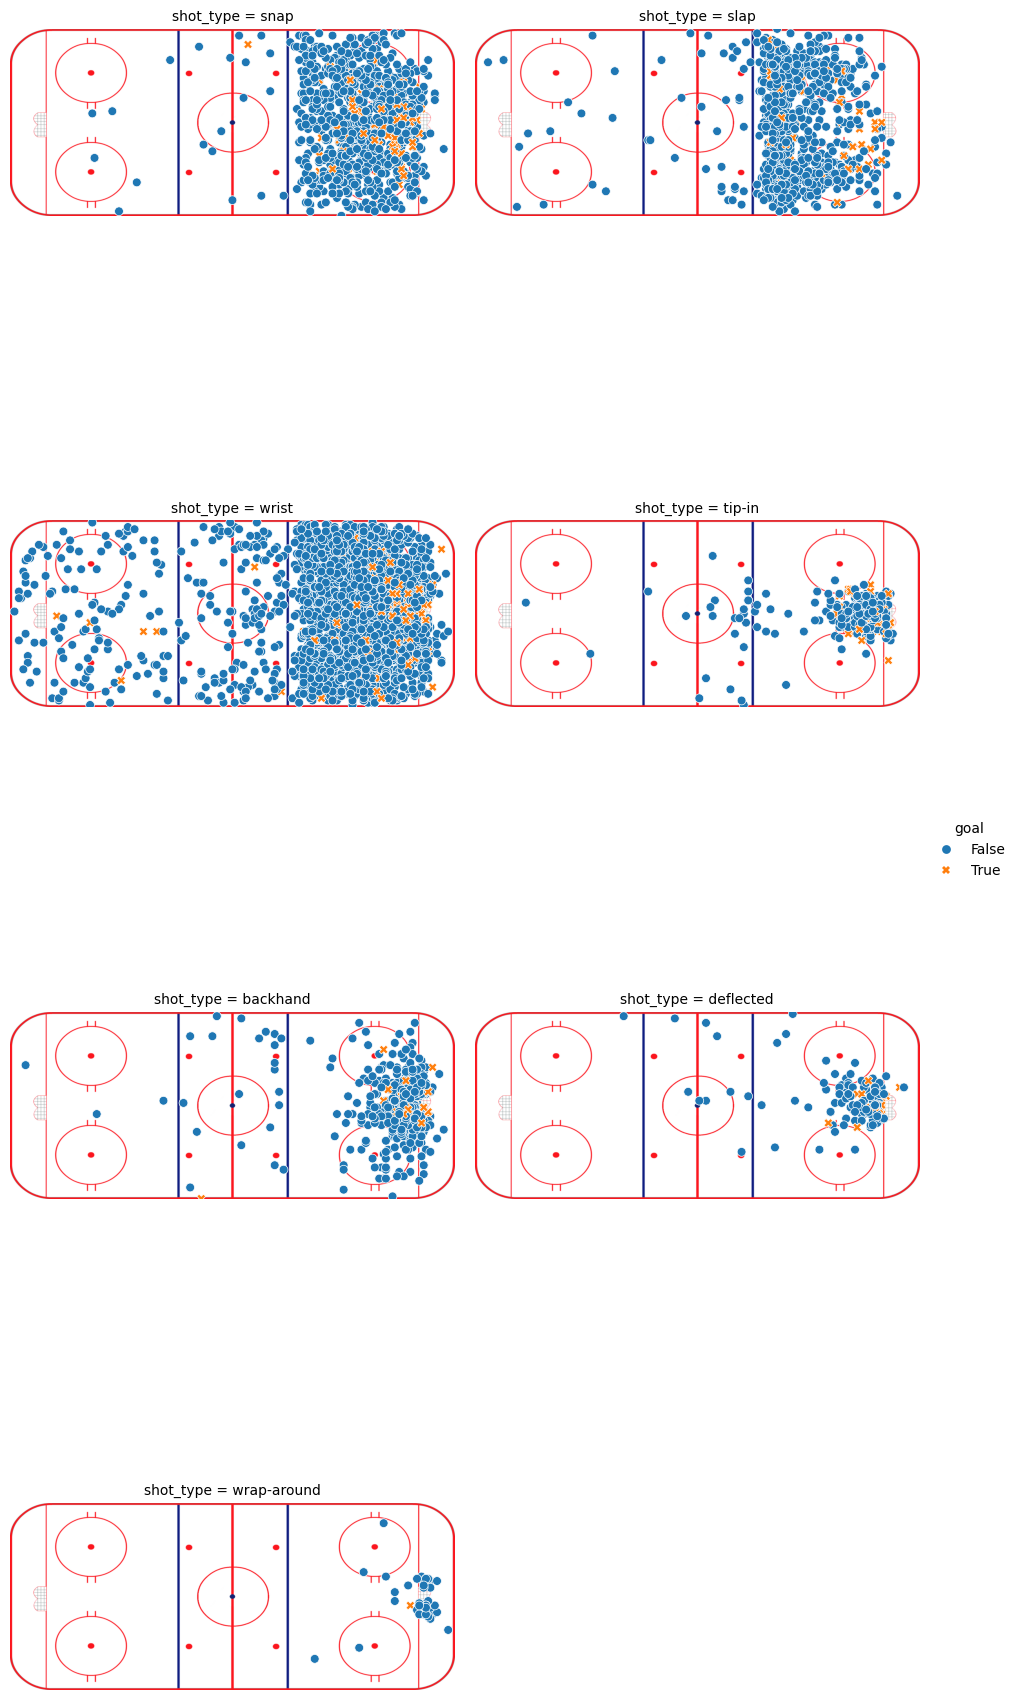

In [60]:
g = shot_chart(dfs, col="shot_type", hue="goal", style="goal", col_wrap=2, s=40)

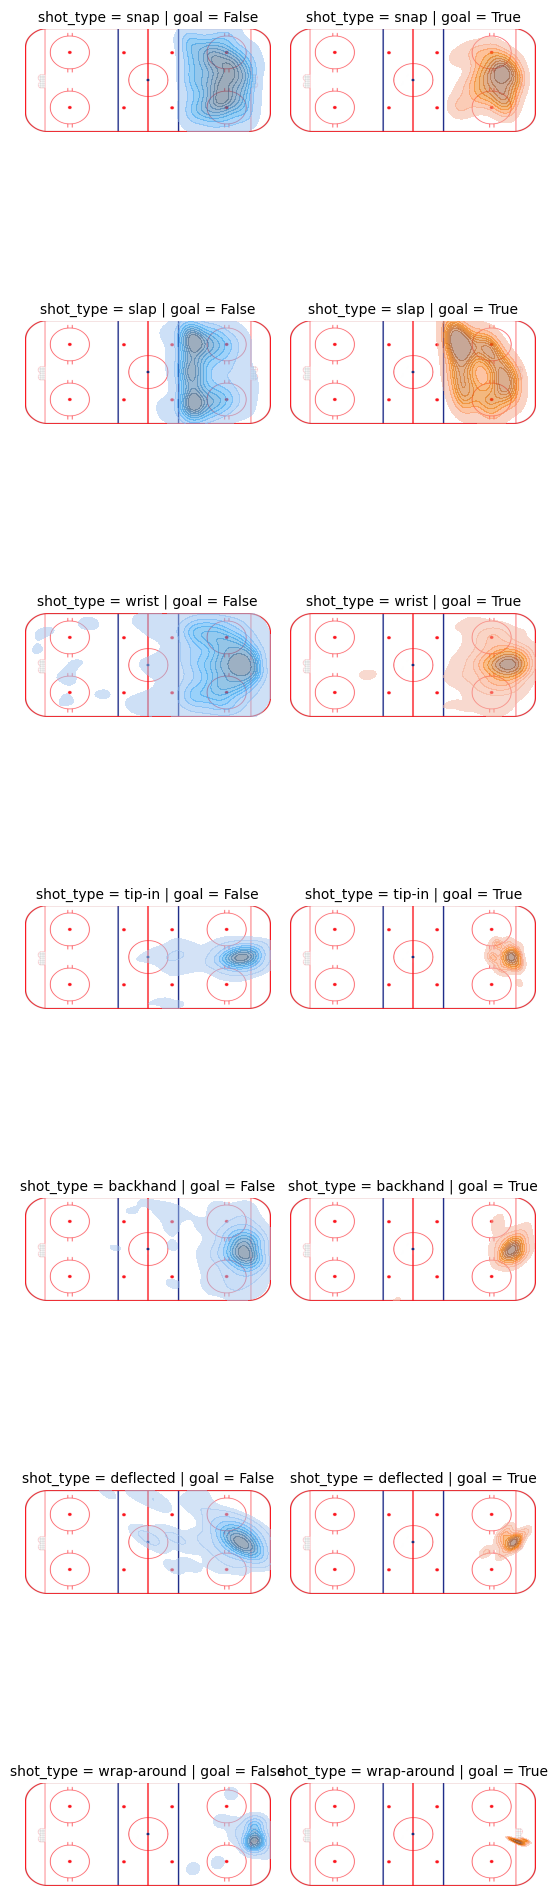

In [61]:
g = (sns.FacetGrid(dfs, col="goal", row="shot_type", hue="goal").map(sns.kdeplot, "st_x", "st_y", alpha=0.5, fill=True))
g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)
for ax in g.figure.axes:
    ax.imshow(map_img, zorder=0, extent=[-100, 100, -42, 42])

In [63]:
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
dfs['dist_sq'] = dfs['dist']**2
dfs['goal'] = dfs['goal'].astype(int)

In [71]:
model = smf.ols(formula="goal ~ dist + dist_sq", data=dfs)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.035   
Dependent Variable: goal             AIC:                353.1685
Date:               2025-03-10 21:09 BIC:                374.4003
No. Observations:   8754             Log-Likelihood:     -173.58 
Df Model:           2                F-statistic:        160.4   
Df Residuals:       8751             Prob (F-statistic): 3.84e-69
R-squared:          0.035            Scale:              0.060939
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     0.1749    0.0067   26.1830  0.0000   0.1618   0.1880
dist         -0.0039    0.0002  -15.9408  0.0000  -0.0044  -0.0034
dist_sq       0.0000    0.0000   10.9744  0.0000   0.0000   0.0000
-----------------------------------------------------------------
Omnibus:             5717.672     Durbin-Watson:        2.035    
Prob(Omnibus):       0.000        Jarque-Bera (JB):     45792.052
Skew:                3.254        Prob(JB):             0.000    
Kurtosis:            12.121       Condition No.:        10394    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [72]:
dfs['goal_hat'] = results.predict(dfs)

In [73]:
dfs.head()

,name,pos,dist,hand,st_x,st_y,goal,team,event,period,...,goalie,scorer,date_time,shot_type,missed_net,empty,gw,period_min,dist_sq,goal_hat
0,J. McCann,C,31.575307,L,58.0,6.0,0,PIT,Shot,1,...,8475622.0,NaN,2019-10-04 00:14:44,snap,False,False,False,1,997.0,0.070496
1,J. Skinner,LW,87.281155,L,2.0,7.0,0,BUF,Shot,1,...,8476899.0,NaN,2019-10-04 00:14:51,slap,False,False,False,1,7618.0,-0.020415
2,J. Vesey,LW,9.486833,L,86.0,9.0,0,BUF,Shot,1,...,8476899.0,NaN,2019-10-04 00:15:13,wrist,False,False,False,1,90.0,0.139521
3,C. Sheary,LW,19.416488,L,85.0,-19.0,0,BUF,Shot,1,...,8476899.0,NaN,2019-10-04 00:15:40,wrist,False,False,False,2,377.0,0.106175
4,R. Ristolainen,D,59.941638,R,36.0,-28.0,0,BUF,Shot,1,...,8476899.0,NaN,2019-10-04 00:16:08,wrist,False,False,False,2,3593.0,0.009320


In [75]:
model = smf.ols(formula="goal ~ C(shot_type, Treatment(reference='wrist')) + dist + dist_sq", data=dfs)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Ordinary least squares
==========================================================================================================
Model:                            OLS                           Adj. R-squared:                  0.047    
Dependent Variable:               goal                          AIC:                             2011.9249
Date:                             2025-03-10 21:18              BIC:                             2072.8154
No. Observations:                 6410                          Log-Likelihood:                  -996.96  
Df Model:                         8                             F-statistic:                     40.45    
Df Residuals:                     6401                          Prob (F-statistic):              1.75e-63 
R-squared:                        0.048                         Scale:                           0.080026 
----------------------------------------------------------------------------------------------------------
                                                           Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                                  0.2331   0.0103  22.5678 0.0000  0.2128  0.2533
C(shot_type, Treatment(reference='wrist'))[T.backhand]    -0.0232   0.0136  -1.7022 0.0888 -0.0499  0.0035
C(shot_type, Treatment(reference='wrist'))[T.deflected]    0.0093   0.0248   0.3753 0.7075 -0.0393  0.0578
C(shot_type, Treatment(reference='wrist'))[T.slap]         0.0367   0.0109   3.3570 0.0008  0.0153  0.0581
C(shot_type, Treatment(reference='wrist'))[T.snap]         0.0309   0.0103   2.9903 0.0028  0.0106  0.0511
C(shot_type, Treatment(reference='wrist'))[T.tip-in]       0.0137   0.0164   0.8340 0.4043 -0.0185  0.0458
C(shot_type, Treatment(reference='wrist'))[T.wrap-around] -0.1084   0.0359  -3.0160 0.0026 -0.1789 -0.0379
dist                                                      -0.0055   0.0004 -15.1456 0.0000 -0.0062 -0.0048
dist_sq                                                    0.0000   0.0000  11.2027 0.0000  0.0000  0.0000
----------------------------------------------------------------------------------------------------------
Omnibus:                          3258.479                   Durbin-Watson:                      2.004    
Prob(Omnibus):                    0.000                      Jarque-Bera (JB):                   14744.131
Skew:                             2.602                      Prob(JB):                           0.000    
Kurtosis:                         8.303                      Condition No.:                      45651    
==========================================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+04. This might indicate                that there are strong
multicollinearity or other numerical                problems.
"""

In [77]:
dfs["is_backhand"] = dfs["shot_type"] == "backhand"

In [78]:
model = smf.ols(formula="goal ~ dist + is_backhand + dist:is_backhand", data=dfs)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                  OLS                Adj. R-squared:       0.023   
Dependent Variable:     goal               AIC:                  464.5875
Date:                   2025-03-10 21:20   BIC:                  492.8966
No. Observations:       8754               Log-Likelihood:       -228.29 
Df Model:               3                  F-statistic:          69.36   
Df Residuals:           8750               Prob (F-statistic):   2.51e-44
R-squared:              0.023              Scale:                0.061713
-------------------------------------------------------------------------
                          Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                 0.1177   0.0050  23.5444 0.0000  0.1079  0.1275
is_backhand[T.True]       0.0500   0.0161   3.1111 0.0019  0.0185  0.0815
dist                     -0.0014   0.0001 -12.7820 0.0000 -0.0016 -0.0012
dist:is_backhand[T.True] -0.0009   0.0006  -1.7004 0.0891 -0.0020  0.0001
-------------------------------------------------------------------------
Omnibus:               5821.051        Durbin-Watson:           2.040    
Prob(Omnibus):         0.000           Jarque-Bera (JB):        47976.125
Skew:                  3.321           Prob(JB):                0.000    
Kurtosis:              12.349          Condition No.:           275      
=========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

In [80]:
dfs = dfs.loc[dfs['shot_type'].notnull()]

In [81]:
cont_vars = ['dist_x', 'st_x', 'st_y', 'period_time_remaining', 'empty']
cat_vars = ['pos', 'hand', 'period']
df_cat = pd.concat([pd.get_dummies(dfs[x]) for x in cat_vars], axis=1)

In [84]:
dfs['period'] = 'P' + dfs['period'].astype(str)

/var/folders/3_/qlydfz1165v__z4jwp9tb0t00000gn/T/ipykernel_81324/761429300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['period'] = 'P' + dfs['period'].astype(str)


In [85]:
df_all = pd.concat([dfs[cont_vars], df_cat], axis=1)

KeyError: "['dist_x'] not in index"